In [25]:
import pandas as pd
df1 = pd.read_csv('ViewingActivity.csv')
df2 = pd.read_csv('NetflixViewingHistory.csv')
pd.set_option("display.max_rows", None)

In [9]:
df1.shape


(126, 10)

In [8]:
df2.shape

(5591, 2)

In [11]:
df1.head(1)


,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,ZAUSKIHAUS,2023-08-09 10:09:43,00:08:58,NaN,Suits: Season 2: Normandy (Episode 15),NaN,iPhone 12 Pro,00:15:00,00:15:00,US (United States)


In [10]:
df2.head(1)

,Title,Date
0,S.W.A.T.: Season 4: 3 Seventeen Year Olds,7/20/2023


Dropping Uneccesary columns

In [12]:
df1 = df1.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df1.head(1)

,Start Time,Duration,Title
0,2023-08-09 10:09:43,00:08:58,Suits: Season 2: Normandy (Episode 15)


Understanding the remaining data types

In [13]:
df1.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [29]:
df2.dtypes

Title            object
Date     datetime64[ns]
dtype: object

Converting start time into real time

In [16]:
df1['Start Time'] = pd.to_datetime(df1['Start Time'], utc=True)
df1.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [27]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2.dtypes

Title            object
Date     datetime64[ns]
dtype: object

Change to local time

In [17]:
# change the Start Time column into the dataframe's index
df1 = df1.set_index('Start Time')

# convert from UTC timezone to eastern time
df1.index = df1.index.tz_convert('US/Eastern')

# reset the index so that Start Time becomes a column again
df1 = df1.reset_index()

#double-check that it worked
df1.head(1)

,Start Time,Duration,Title
0,2023-08-09 06:09:43-04:00,00:08:58,Suits: Season 2: Normandy (Episode 15)


Change duration to delta time

In [18]:
df1['Duration'] = pd.to_timedelta(df1['Duration'])
df1.dtypes

Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
dtype: object

In [26]:
df1.value_counts('Title')


Title
Suits: Season 1_hook_primary_16x9                          6
Suits: Season 2: Meet the New Boss (Episode 3)             5
Suits: Season 2: Zane Vs. Zane (Episode 13)                4
Suits: Season 1: The Shelf Life (Episode 10)               4
S.W.A.T.: Season 5: Madrugada (Episode 2)                  4
Suits: Season 2: He's Back (Episode 14)                    3
Suits: Season 1: Tricks of the Trade (Episode 6)           3
The Fast and the Furious_hook_04_16x9                      3
Suits: Season 1: Rules of the Game (Episode 11)            3
Suits: Season 1: Bail Out (Episode 5)                      3
Suits: Season 1: Errors and Omissions (Episode 2)          3
Suits: Season 1: Dirty Little Secrets (Episode 4)          3
S.W.A.T.: Season 4: Buried (Episode 10)                    3
Suits: Season 2: She Knows (Episode 1)                     3
S.W.A.T.: Season 4: Fracture (Episode 5)                   2
S.W.A.T.: Season 4: The Black Hand Man (Episode 3)         2
Suits: Season 1: I

In [30]:
office = df2[df2['Title'].str.contains('The Office (U.S.)', regex=False)]
office.shape

(384, 2)

which days of the week do you watch the most office

In [70]:
office.drop(['weekday', 'Weekday'], axis = 1)
office['Weekday'] = office['Date'].dt.day_name()
office.head()
office.tail()

C:\Users\dzaus\AppData\Local\Temp\ipykernel_1776\2770388298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['Weekday'] = office['Date'].dt.day_name()


,Title,Date,weekday,Weekday
3341,The Office (U.S.): Basketball,2017-05-10,2,Wednesday
3342,The Office (U.S.): The Alliance,2017-05-10,2,Wednesday
3343,The Office (U.S.): Health Care,2017-05-10,2,Wednesday
3344,The Office (U.S.): Diversity Day,2017-05-10,2,Wednesday
3345,The Office (U.S.): Pilot,2017-05-10,2,Wednesday


In [61]:
%matplotlib inline
import matplotlib
import seaborn as sns


C:\Users\dzaus\AppData\Local\Temp\ipykernel_1776\105291341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['weekday'] = pd.Categorical(office['weekday'], categories=


<Axes: title={'center': 'Office Episodes Watched by Day 2017-2022'}, xlabel='weekday'>

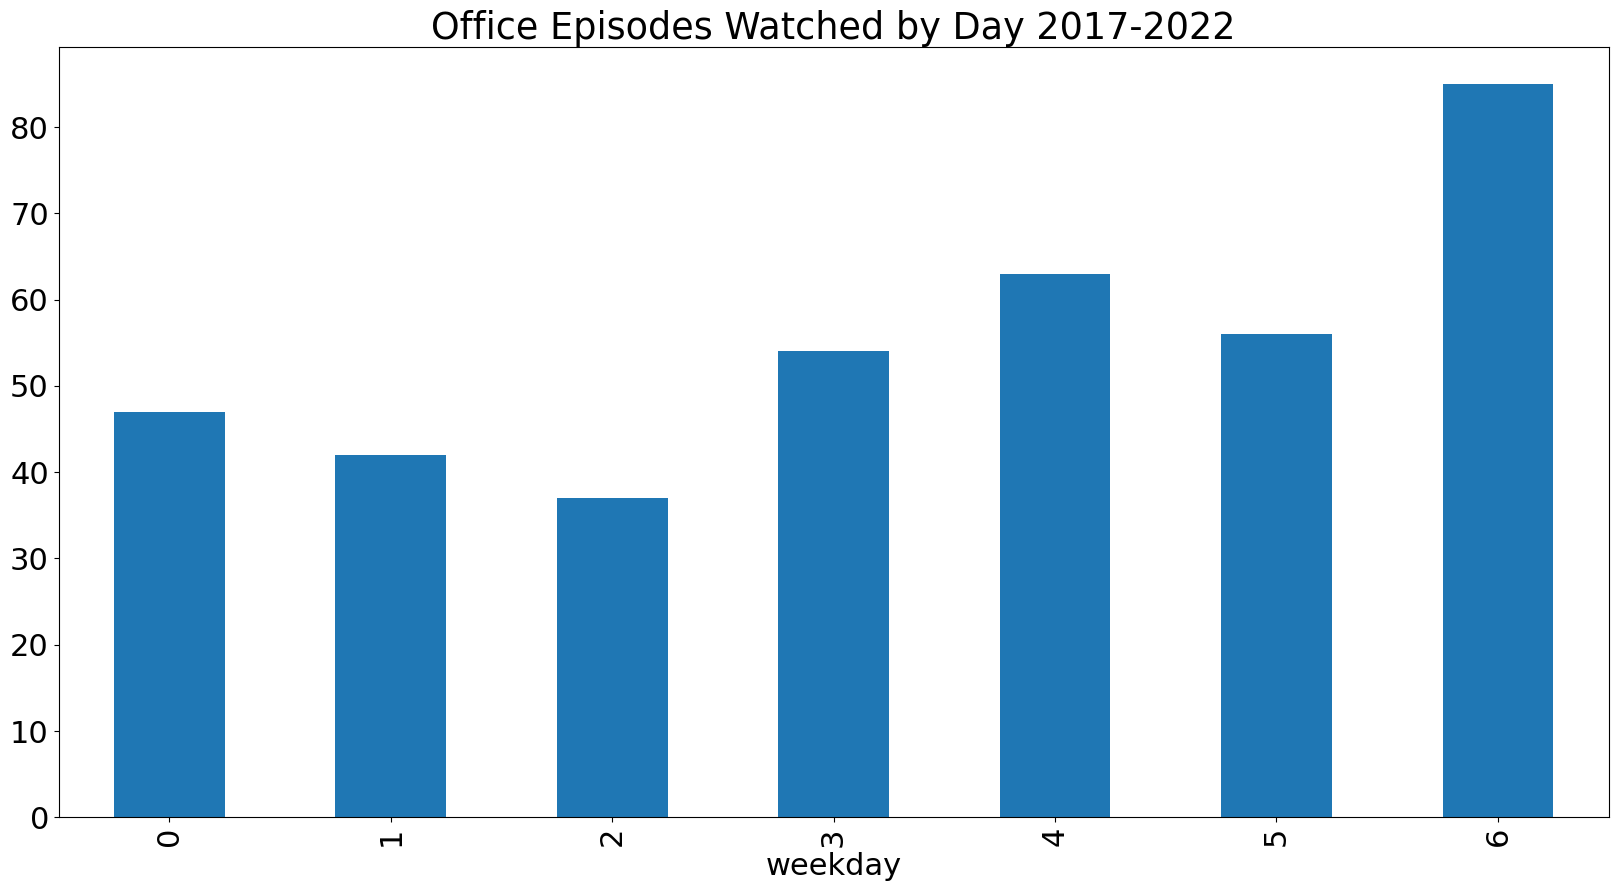

In [71]:

# set our categorical and define the order so the days are plotted Monday-Sunday
office['weekday'] = pd.Categorical(office['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

# create office_by_day and count the rows for each weekday, assigning the result to that variable
office_by_day = office['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
office_by_day = office_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

# plot office_by_day as a bar chart with the listed size and title
office_by_day.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Day 2017-2022')